# Circuit of Deutsch-Jozsa Algorithm using Qiskit

This notebook will teach you how to construct your own circuits for the Deutsch-Jozsa algorithm using Qiskit.

# Install Qiskit

Install Qiskit if you haven't. Here we are not installing the latest version of Qiskit since it has an issue with displaying circuits using matplotlib (fancy circuits) in Colab.

In [ ]:
!pip install qiskit==0.16.1

# Importing Packages

In [ ]:
from qiskit import * # No need to explain why
import matplotlib as mpl # Required to display some fancy circuits

# The circuit

Now, we move on to main part of the notebook. In this section, we shall explain the construction of circuits for all types of functions defined on two binary variables, that one can use Deutsch-Jozsa algorithm for. In this case, the Deutsch-Jozsa algorithm is used to figure out, whether a function $f:\{00,01,10,11\} \rightarrow \{0,1\}$ is balanced or constant. 

Since there are 4 possible inputs for these functions, a balanced functions will have 2 inputs producing the output 0 and 2 inputs producing the output 1. A constant function is a function whose output is 0 or 1, no matter what input is provided.

Let $U_f$ be an oracle circuit such that
\begin{equation}
  U_f |x\rangle |y\rangle |z\rangle = |x\rangle |y\rangle |z \oplus f(x,y)\rangle
\end{equation}
Then, the circuit for the Deutsch-Jozsa algorithm is given as

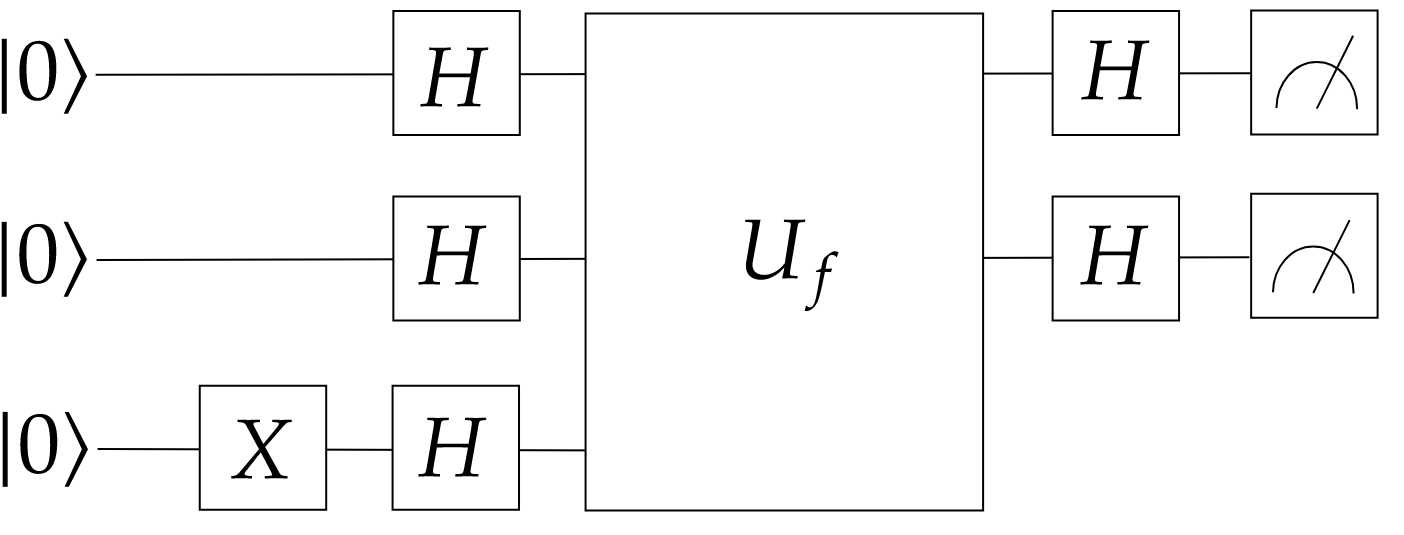

If the output after measuring the first and second qubits is 00, then the function is constant and if the output is anything else, the function is balanced. There are 8 such possible functions; 6 balanced ones and 2 constant ones. In the next sections, we shall explain the construction of the circuit for each of the functions

# General Example

Consider an oracle of the form

In [ ]:
# Oracle
qc.cnot(0,2)
qc.x(1)
qc.x(0)
qc.cnot(1,2)
qc.x(2)
qc.cnot(0,2)
qc.x(1)
qc.cnot(1,2)
qc.x(0)


Lets see how we can carry out Deutsch-Josza algorithm using Qiskit

First, we prepare the quantum register. As we can see, from the circuit, the quantum register comprises of 3 qubits. Hence

In [ ]:
# Prepare quantum register
qr = QuantumRegister(3)

Next, we shall prepare the classical register which will have the classical output after measurement. Since the circuit only requires measuring two qubits, the classical register requires only two bits. So 

In [ ]:
# Prepare classical register
cr = ClassicalRegister(2)

Combining both the quantum and classical registers, we now define the quantum circuit

In [ ]:
# Prepare quantum circuit
qc = QuantumCircuit(qr, cr)

Now, we shall start applying the gates.

First step is to prepare $|-\rangle$ in the third qubit. This is done by applying an $X$ gate followed by a $H$ gate.

In [ ]:
# Apply X gate on qubit 2
qc.x(2)

# Apply Hadamard gate on qubit 2
qc.h(2)

Next we apply $H$ gates on the first and second qubits, then our oracle, and two more $H$ gates on the first and second qubits.

In [ ]:
# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(0,2)
qc.x(1)
qc.x(0)
qc.cnot(1,2)
qc.x(2)
qc.cnot(0,2)
qc.x(1)
qc.cnot(1,2)
qc.x(0)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

Now, we shall measure the first qubit and store the result in the prepared classical register. The measurement is done 100 times, that is, the circuit is repeatedly carried out 100 times.

In [ ]:
# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

Measurement result: {'00': 100}


The measurement result is read as {'Output': Number of times output occurred}. We can see that, the output is always 00, confirming that the function that the oracle represents is a constant function.

The circuit that we have just build can be visualized using Qiskit using this code

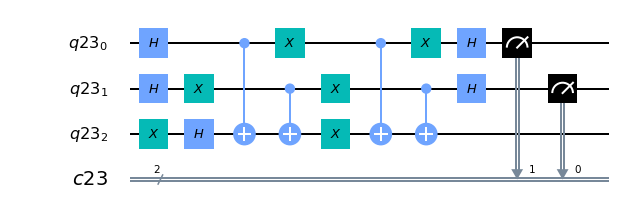

In [ ]:
# Display circuit
qc.draw(output = "mpl")

Now, let's verify if the function was indeed constant by computing the outputs of all possible inputs.

In [ ]:
# This function converts a decimal number to its binary expansion
def Binary(x, BitNo):
  format(x, 'b').zfill(BitNo)
  Binlist = [int(y) for y in list(format(x, 'b').zfill(BitNo))]
  return Binlist

for i in range(4):
  # Compute the binary expansion of i
  bin_list = Binary(i, 2)
  

  # Prepare the circuit
  qr = QuantumRegister(3)
  cr = ClassicalRegister(1)
  qc = QuantumCircuit(qr, cr)

  # Reverse the output since Qiskit considers the least significant bit to be the leftmost.
  bin_list.reverse()

  # Prepare the state associated with i
  for j in range(2):
    if bin_list[j] == 1:
      qc.x(j)

  # Oracle
  qc.cnot(0,2)
  qc.x(1)
  qc.x(0)
  qc.cnot(1,2)
  qc.x(2)
  qc.cnot(0,2)
  qc.x(1)
  qc.cnot(1,2)
  qc.x(0)

  # Measure qubit 2
  qc.measure(2, 0)
  backend = Aer.get_backend('qasm_simulator')
  job_sim = execute(qc, backend, shots = 100)
  sim_result = job_sim.result()
  counts = sim_result.get_counts(qc)

  print("Input: {}".format(i))
  print("Output: {}".format(counts))

Input: 0
Output: {'1': 100}
Input: 1
Output: {'1': 100}
Input: 2
Output: {'1': 100}
Input: 3
Output: {'1': 100}


The function is indeed constant

# Circuits for balanced functions

We start with balanced functions. 

## Case 1

Let $f_1:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_1(00) = 0 \\
  f_1(01) = 1 \\
  f_1(10) = 0 \\
  f_1(11) = 1 \\
\end{equation}

The first step is to construct $U_{f_1}$. By the definition of $U_{f_1}$, one can see that $U_{f_1}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_1}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_1(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_1}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_1(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_1}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_1(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_1}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_1(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_1}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_1(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_1}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_1(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_1}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_1(11)\rangle = |1\rangle|1\rangle|1\rangle\\
  U_{f_1}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_1(11)\rangle = |1\rangle|1\rangle|0\rangle\\
\end{equation}

This circuit is simply a CNOT gate applied to the second and third qubit. So, for this function, a single CNOT gate is the required oracle $U_{f_1}$. Then the final circuit can be seen as

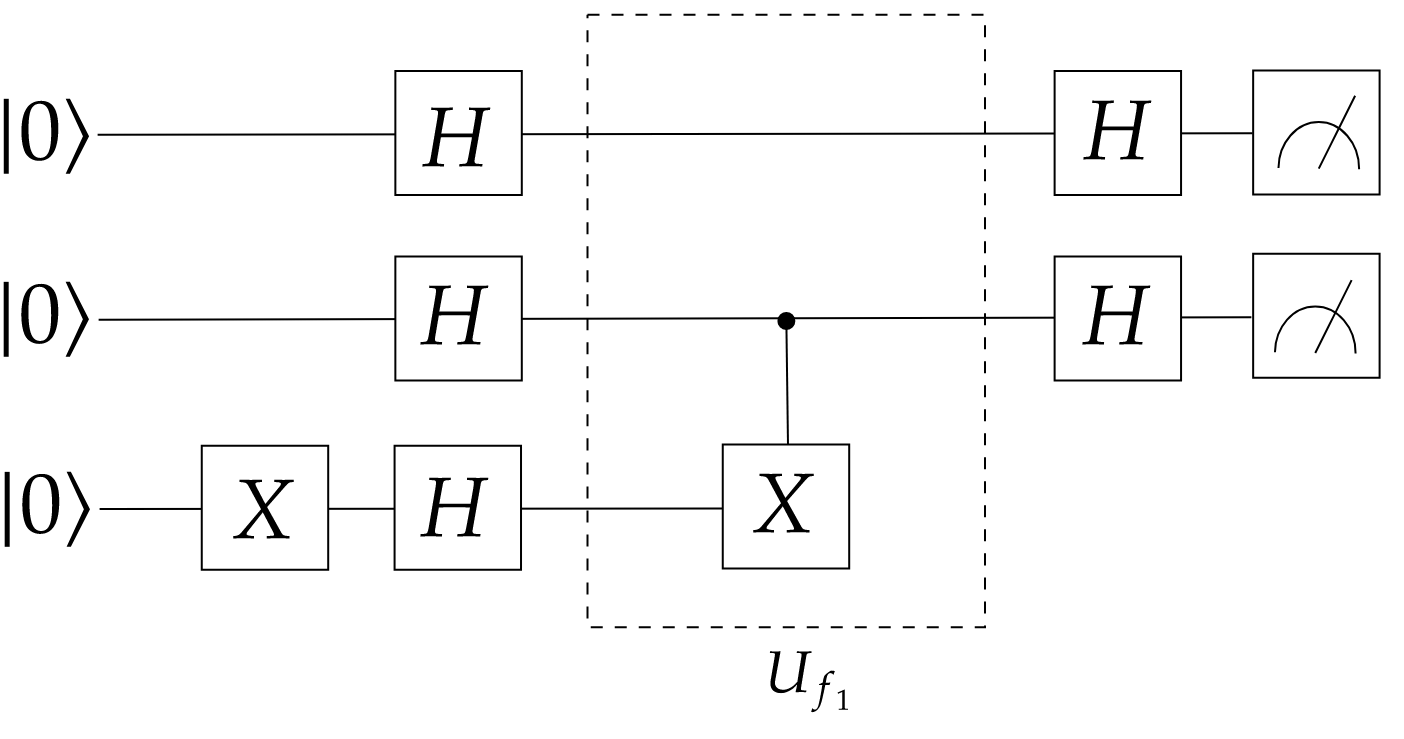

Executing the cell below runs a quantum circuit for the Deutsch-Jozsa algorithm for the function $f_2$ 100 times.

Measurement result: {'01': 100}


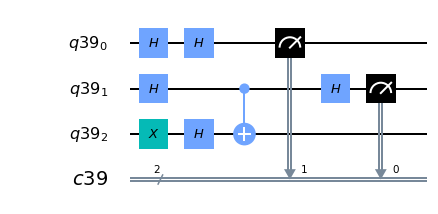

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(1,2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

## Case 2

Let $f_2:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_2(00) = 1 \\
  f_2(01) = 0 \\
  f_2(10) = 1 \\
  f_2(11) = 0 \\
\end{equation}

The first step is to construct $U_{f_2}$. By the definition of $U_{f_2}$, one can see that $U_{f_2}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_2}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_2(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_2}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_2(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_2}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_2(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_2}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_2(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_2}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_2(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_2}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_2(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_2}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_2(11)\rangle = |1\rangle|1\rangle|0\rangle\\
  U_{f_2}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_2(11)\rangle = |1\rangle|1\rangle|1\rangle\\
\end{equation}

You can see that $f_2$ is essentially $f_1$ with a bit flip at the end. Therefore, the circuit $U_{f_2}$ is nothing but a CNOT with the second qubit as control and the third qubit as target, followed by an $X$ gate on the third (target) qubit.

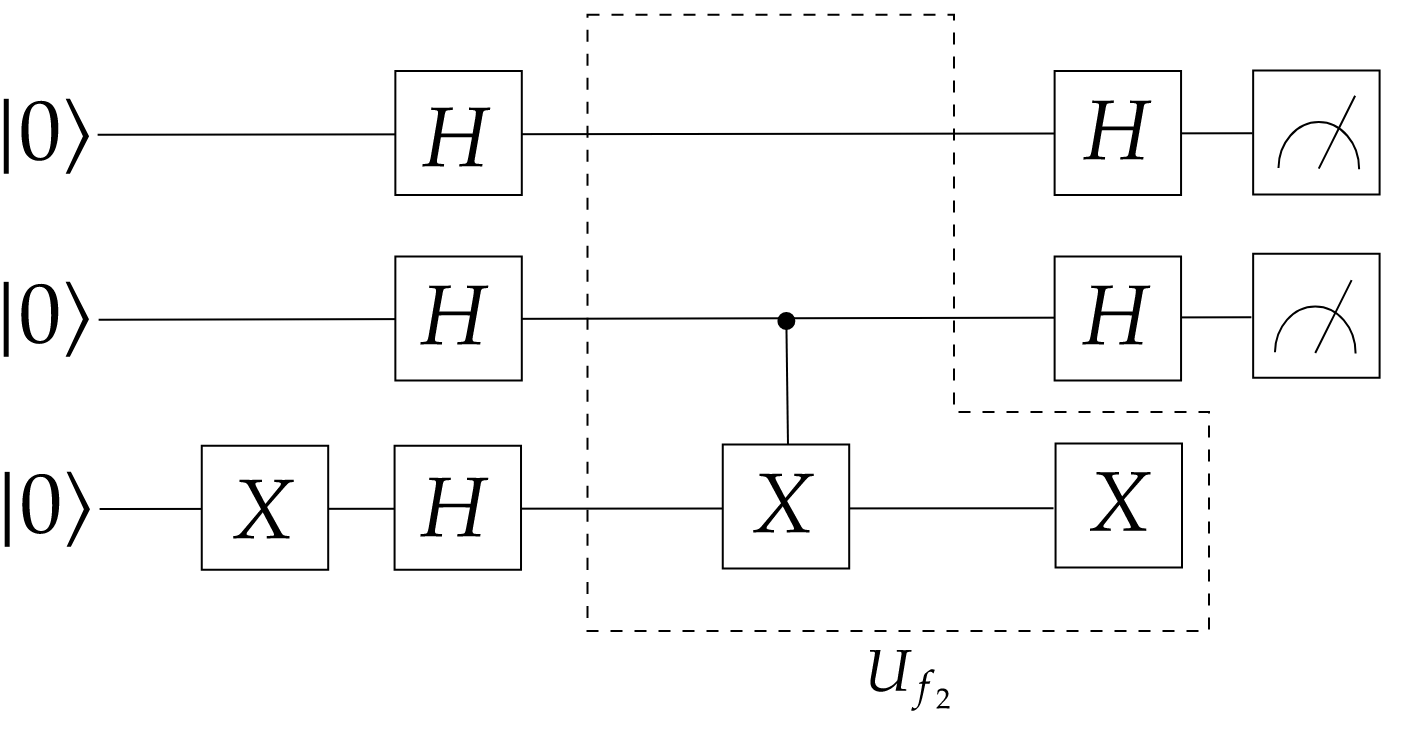

We can see from the circuit that the last $X$ gate on the third qubit does not interfere with the first and second qubits in any way and hence the result after measuring the first and second qubits should not be any different from $f_1$'s circuit


Executing the cell below runs a quantum circuit for the Deutsch-Jozsa algorithm for the function $f_2$ 100 times.

Measurement result: {'01': 100}


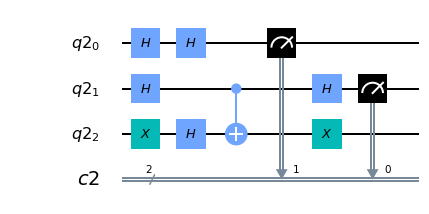

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(1,2)
qc.x(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

In this case also, as expected, we can see that, the output is never 00. 

## Case 3

Let $f_3:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_3(00) = 0 \\
  f_3(01) = 0 \\
  f_3(10) = 1 \\
  f_3(11) = 1 \\
\end{equation}

The first step is to construct $U_{f_3}$. By the definition of $U_{f_3}$, one can see that $U_{f_3}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_3}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_3(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_3}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_3(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_3}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_3(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_3}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_3(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_3}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_3(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_3}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_3(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_3}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_3(11)\rangle = |1\rangle|1\rangle|1\rangle\\
  U_{f_3}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_3(11)\rangle = |1\rangle|1\rangle|0\rangle\\
\end{equation}

This circuit is simply a CNOT gate applied to the first and third qubit. So, for this function, a single CNOT gate is the required oracle $U_{f_3}$. Then the final circuit can be seen as

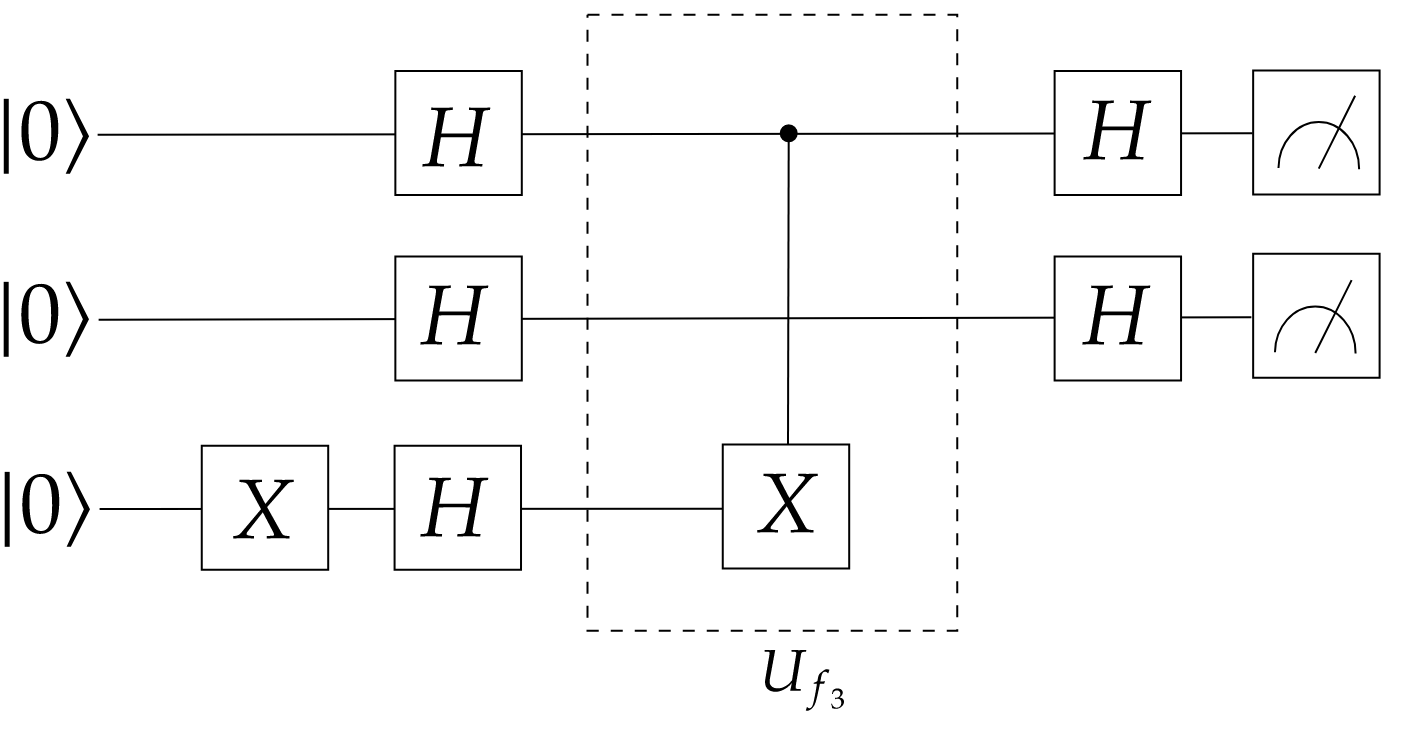

Executing the cell below runs a quantum circuit for the Deutsch-Jozsa algorithm for the function $f_3$ 100 times.

Measurement result: {'10': 100}


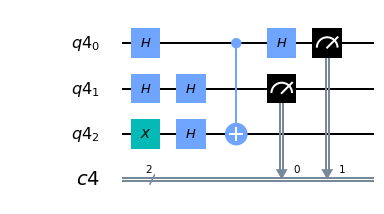

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(0,2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

In this case also, as expected, we can see that, the output is never 00. 

## Case 4

Let $f_4:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_4(00) = 1 \\
  f_4(01) = 1 \\
  f_4(10) = 0 \\
  f_4(11) = 0 \\
\end{equation}

The first step is to construct $U_{f_4}$. By the definition of $U_{f_4}$, one can see that $U_{f_4}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_4}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_4(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_4}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_4(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_4}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_4(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_4}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_4(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_4}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_4(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_4}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_4(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_4}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_4(11)\rangle = |1\rangle|1\rangle|0\rangle\\
  U_{f_4}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_4(11)\rangle = |1\rangle|1\rangle|1\rangle\\
\end{equation}

You can see that $f_4$ is essentially $f_3$ with a bit flip at the end. Therefore, the circuit $U_{f_4}$ is nothing but a CNOT with the first qubit as control and the third qubit as target, followed by an $X$ gate on the third (target) qubit.

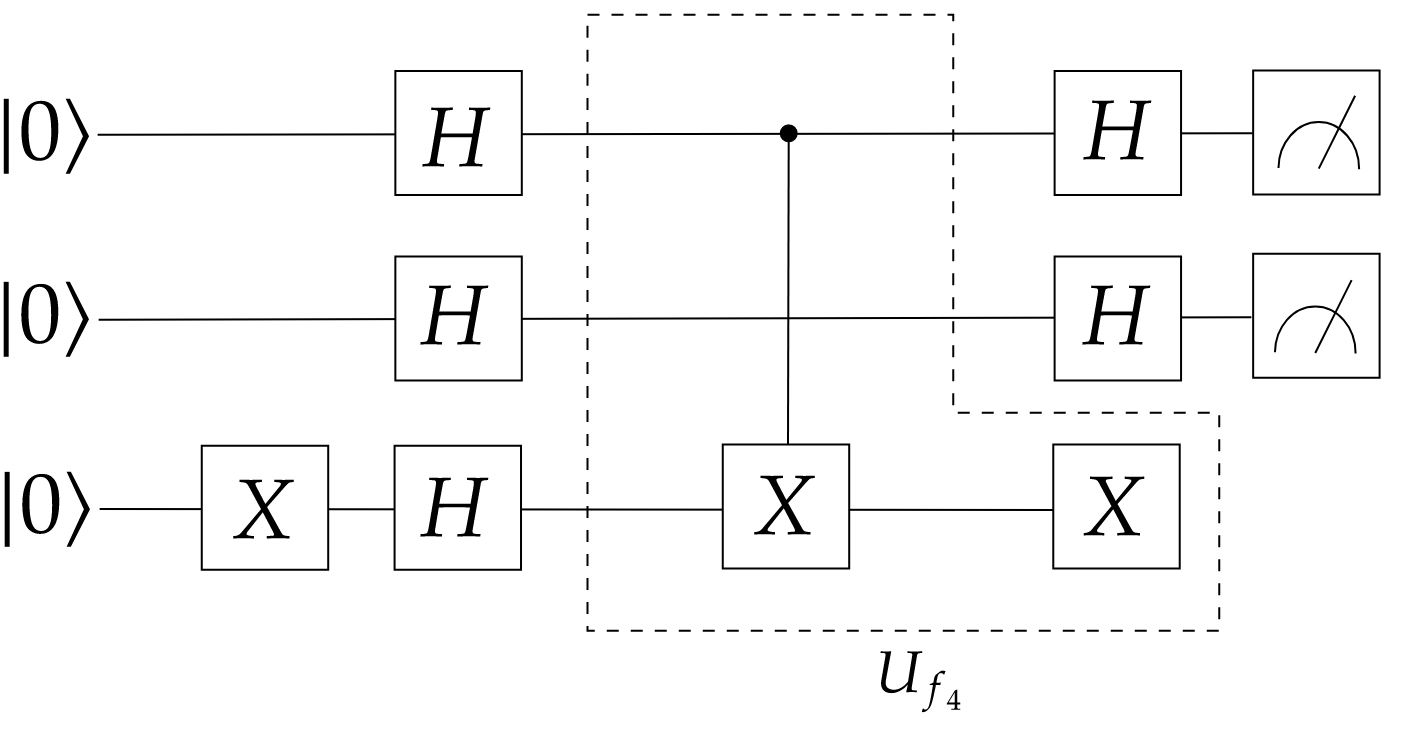

We can see from the circuit that the last $X$ gate on the third qubit does not interfere with the first and second qubits in any way and hence the result after measuring the first and second qubits should not be any different from $f_3$'s circuit

Executing the cell below runs a quantum circuit for the Deutsch algorithm for the function $f_4$ 100 times.

Measurement result: {'10': 100}


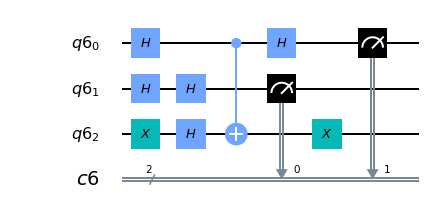

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(0,2)
qc.x(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

In this case also, as expected, we can see that, the output is never 00.

## Case 5

Let $f_5:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_5(00) = 0 \\
  f_5(01) = 1 \\
  f_5(10) = 1 \\
  f_5(11) = 0 \\
\end{equation}

The first step is to construct $U_{f_5}$. By the definition of $U_{f_5}$, one can see that $U_{f_5}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_5}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_5(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_5}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_5(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_5}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_5(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_5}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_5(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_5}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_5(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_5}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_5(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_5}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_5(11)\rangle = |1\rangle|1\rangle|0\rangle\\
  U_{f_5}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_5(11)\rangle = |1\rangle|1\rangle|1\rangle\\
\end{equation}

This circuit is a CNOT gate applied to the first and third qubit, then another CNOT gate applied to the second and third qubit. So, for this function, two CNOT gates is the required oracle $U_{f_5}$. Then the final circuit can be seen as

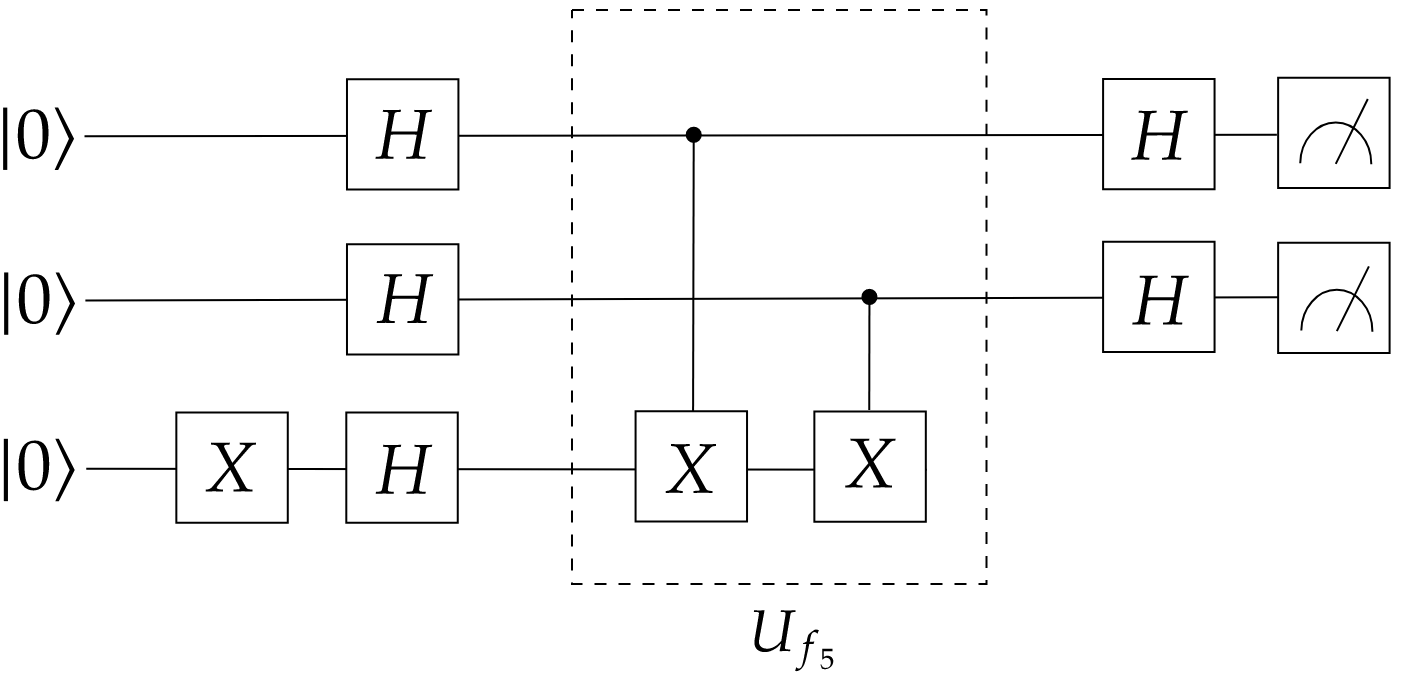

Executing the cell below runs a quantum circuit for the Deutsch-Jozsa algorithm for the function $f_5$ 100 times.

Measurement result: {'11': 100}


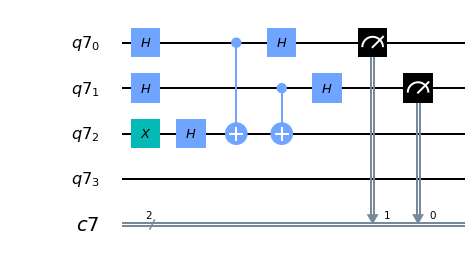

In [ ]:
# Prepare the circuit
qr = QuantumRegister(4)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(0,2)
qc.cnot(1,2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

In this case also, as expected, we can see that, the output is never 00.

## Case 6

Let $f_6:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_6(00) = 1 \\
  f_6(01) = 0 \\
  f_6(10) = 0 \\
  f_6(11) = 1 \\
\end{equation}

The first step is to construct $U_{f_6}$. By the definition of $U_{f_6}$, one can see that $U_{f_6}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_6}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_6(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_6}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_6(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_6}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_6(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_6}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_6(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_6}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_6(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_6}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_6(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_6}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_6(11)\rangle = |1\rangle|1\rangle|1\rangle\\
  U_{f_6}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_6(11)\rangle = |1\rangle|1\rangle|0\rangle\\
\end{equation}

You can see that $f_6$ is essentially $f_5$ with a bit flip at the end. Therefore, the circuit $U_{f_6}$ is nothing but a CNOT with the first qubit as control and the third qubit as target, then another CNOT with the second qubit as control and the third qubit as target followed by an $X$ gate on the third (target) qubit.

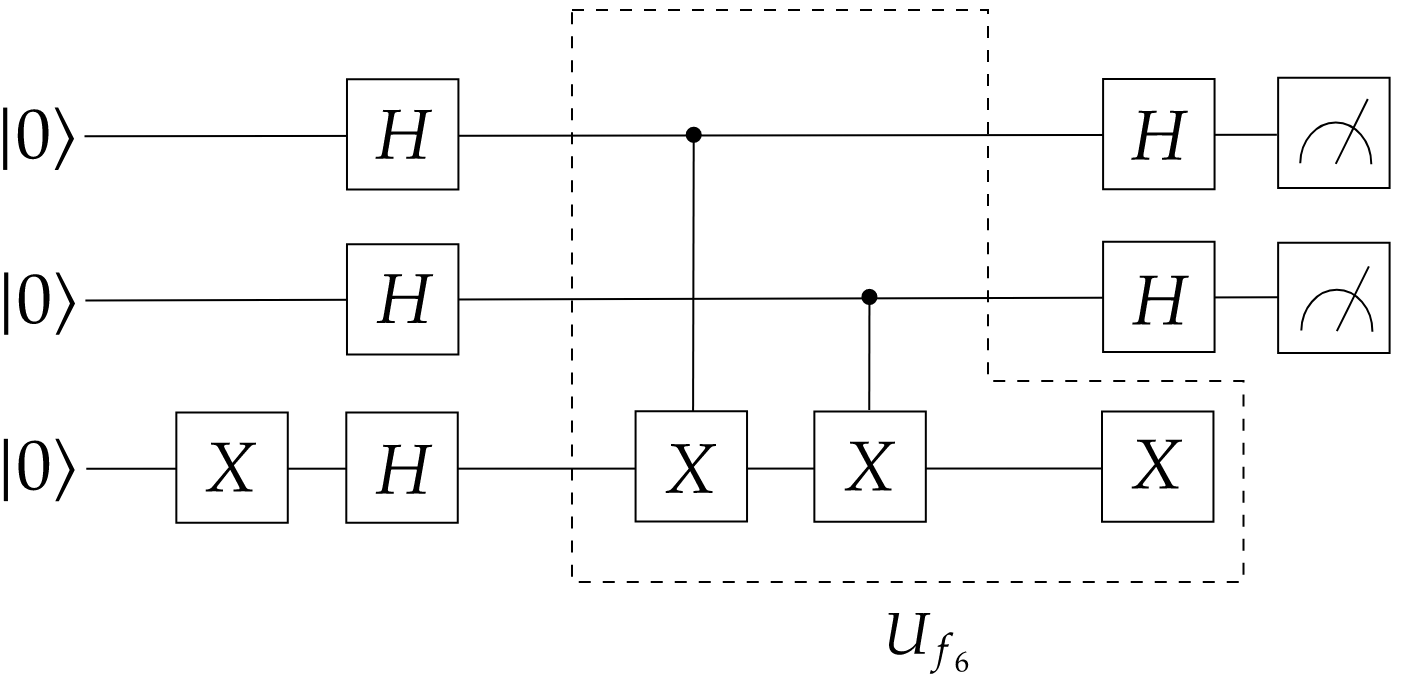

We can see from the circuit that the last $X$ gate on the third qubit does not interfere with the first and second qubits in any way and hence the result after measuring the first and second qubits should not be any different from $f_5$'s circuit

Executing the cell below runs a quantum circuit for the Deutsch-Jozsa algorithm for the function $f_6$ 100 times.

Measurement result: {'11': 100}


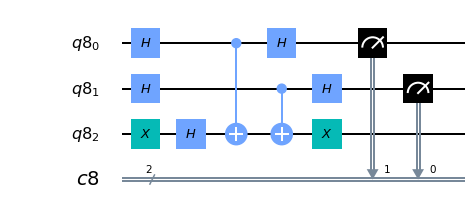

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(0,2)
qc.cnot(1,2)
qc.x(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

In this case also, as expected, we can see that, the output is never 00.

# Circuits for constant functions

Now we shall move on to constant functions. 

## Constant function with 0 as output

Let $\mathcal{C}_0:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  \mathcal{C}_0(00) = 0 \\
  \mathcal{C}_0(01) = 0 \\
  \mathcal{C}_0(10) = 0 \\
  \mathcal{C}_0(11) = 0 \\
\end{equation}

The first step is to construct $U_{\mathcal{C}_0}$. By the definition of $U_{\mathcal{C}_0}$, one can see that $U_{\mathcal{C}_0}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{\mathcal{C}_0}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus \mathcal{C}_0(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{\mathcal{C}_0}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus \mathcal{C}_0(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{\mathcal{C}_0}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus \mathcal{C}_0(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{\mathcal{C}_0}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus \mathcal{C}_0(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{\mathcal{C}_0}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus \mathcal{C}_0(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{\mathcal{C}_0}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus \mathcal{C}_0(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{\mathcal{C}_0}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus \mathcal{C}_0(11)\rangle = |1\rangle|1\rangle|0\rangle\\
  U_{\mathcal{C}_0}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus \mathcal{C}_0(11)\rangle = |1\rangle|1\rangle|1\rangle\\
\end{equation}

This is simply the identity matrix. This means that in this case, from the original circuit for Deutsch-Jozsa algorithm, we can remove the oracle part completely, resulting in the circuit

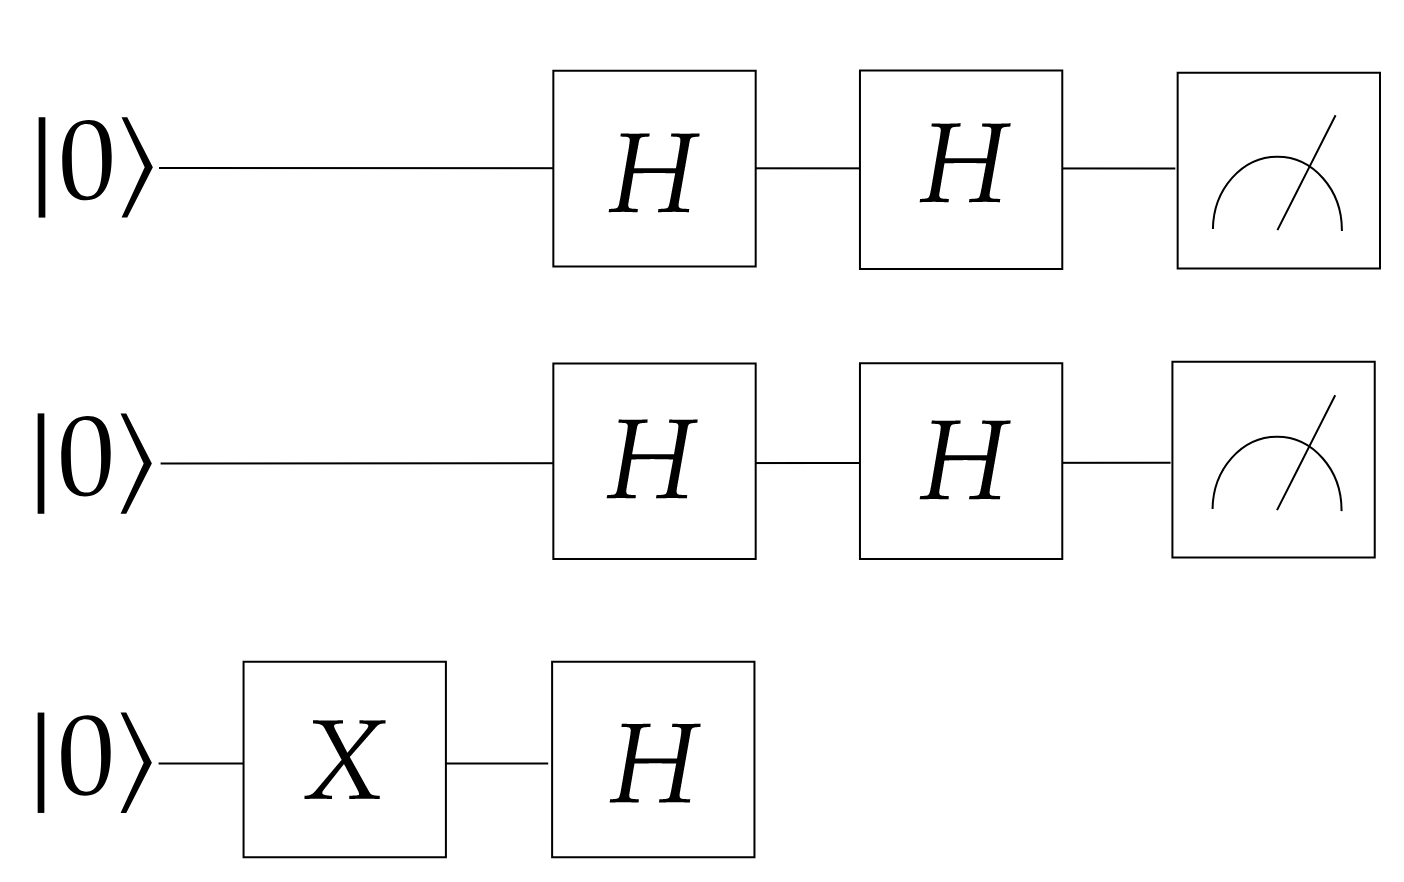

We can clearly see from the circuit why the output of measuring the first and second qubits should be 00. Both the $H$ gates in the first and second registers just cancels out and you are left with $|00\rangle$

Executing the cell below runs a quantum circuit for the Deutsch-Jozsa algorithm for the function $\mathcal{C}_0$ 100 times.

Measurement result: {'00': 100}


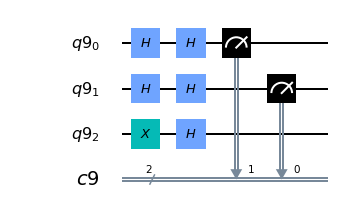

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

As expected, we can see that, the output is always 00. 

## Constant function with 1 as output

Let $\mathcal{C}_1:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  \mathcal{C}_1(00) = 1 \\
  \mathcal{C}_1(01) = 1 \\
  \mathcal{C}_1(10) = 1 \\
  \mathcal{C}_1(11) = 1 \\
\end{equation}

The first step is to construct $U_{\mathcal{C}_1}$. By the definition of $U_{\mathcal{C}_1}$, one can see that $U_{\mathcal{C}_1}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{\mathcal{C}_1}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus \mathcal{C}_1(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{\mathcal{C}_1}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus \mathcal{C}_1(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{\mathcal{C}_1}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus \mathcal{C}_1(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{\mathcal{C}_1}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus \mathcal{C}_1(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{\mathcal{C}_1}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus \mathcal{C}_1(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{\mathcal{C}_1}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus \mathcal{C}_1(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{\mathcal{C}_1}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus \mathcal{C}_1(11)\rangle = |1\rangle|1\rangle|1\rangle\\
  U_{\mathcal{C}_1}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus \mathcal{C}_1(11)\rangle = |1\rangle|1\rangle|0\rangle\\
\end{equation}

This means that the oracle circuit consists of only an $X$ gate on the second qubit. So the final circuit is

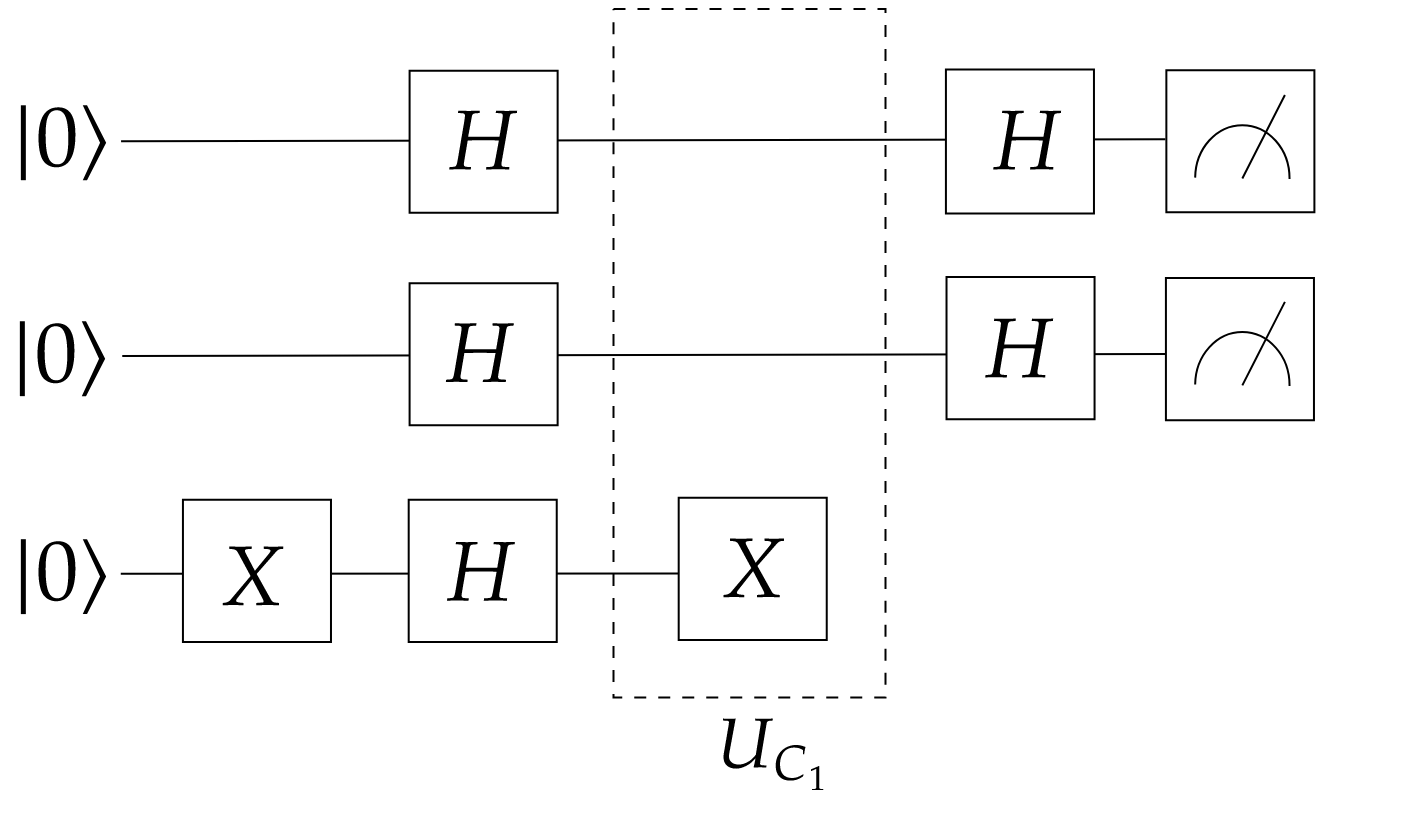

Similar to the case with $\mathcal{C}_0$, the oracle $U_{\mathcal{C}_1}$ also does not do anything to the first and second qubits. Hence, the $H$ gates on the first and second qubits cancel out and measuring those qubits will result in $|00\rangle$


Executing the cell below runs a quantum circuit for Deutsch-Jozsa algorithm for the function $\mathcal{C}_1$ 100 times.

Measurement result: {'00': 100}


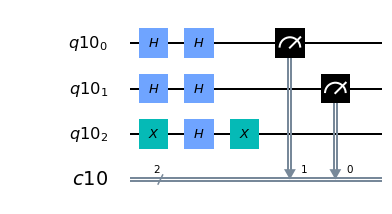

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.x(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

Here also, as expected, we can see that, the output is always 00. 